<a href="https://colab.research.google.com/github/Rhuan-Messias/Termodin-mica/blob/main/Termodin%C3%A2mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício 1 Refrigeração

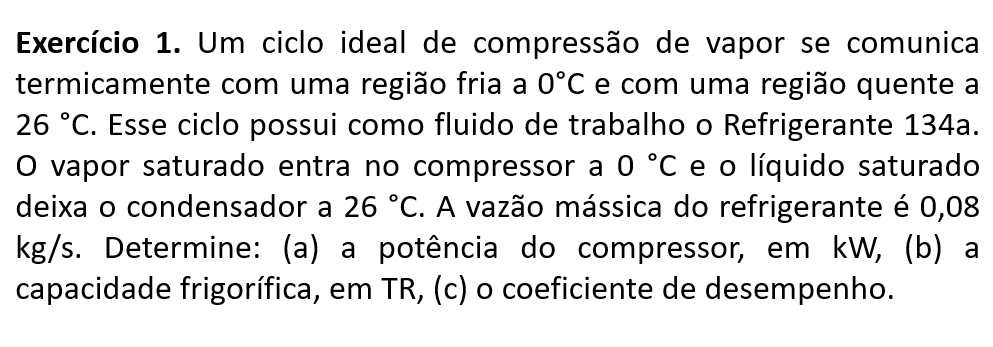

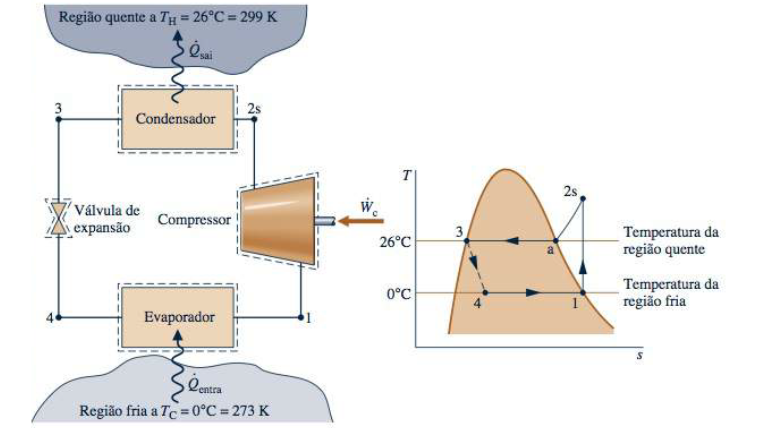

In [ ]:
import numpy as np
import sympy as sp
#Primeiro, encontrar os estados termodinâmicos
#Fluido refrigerante 134a

def interpolar(x1,y1,x2,y2,yi):
    xi = (x2-x1)*(y1-yi)/(y1-y2)+x1
    return xi
#dados
vazão_mássica = 0.08 #kg/s

#Estado (1 Vapor saturado) Tabela A10
h1 = 247.23 # Kj/Kg
s1 = 0.9190 # Kj/Kg.K
#Estado 2s (vapor superaquecido) P no estado 2s é a P de saturação correspondente
#a T de 26 graus C, P = 6,8530
h2 = interpolar(261.97,6,265.159,7,6.853) #Kj/Kg

#Estado 3 (Líquido saturado) T = 26 graus
h3 = 85.75 #Kj/Kg

#Estado 4 
h4 = h3

#Letra A: Potência do compressor 
potencia_compressor = vazão_mássica*np.abs(h1-h2)


#Letra B: capacidade frigorífica em TR
capacidade_frigorifica = vazão_mássica*np.abs(h1-h4)*60 #Kj/s ... Precisa multiplicar por 60 pra 
capacidade_frigorifica = capacidade_frigorifica/211

#letra C: coeficiente de desempenho 
# coeficiente_desempenho = np.abs(h1-h4)/np.abs(h2-h1)
beta,h_1,h_2,h_4 = sp.symbols('beta,h_1,h_2,h_4')
eq_coef_desempenho = sp.Eq(beta,abs(h_1-h_4)/abs(h_2-h_1)) 
display(eq_coef_desempenho)
coef_desempenho = sp.solve(eq_coef_desempenho.subs({h_1:h1,
                                                    h_2:h2,
                                                    h_4:h4
                                                    }))[0]
print(coef_desempenho)


print('Letra A: Potência do compressor =',potencia_compressor,'kW')
print('Letra B: Capacidade frigorifica =',capacidade_frigorifica,'TR')
print('Letra C: Coeficiente de desempenho =',coeficiente_desempenho)

Eq(beta, Abs(h_1 - h_4)/Abs(h_1 - h_2))

9.24845321223669
Letra A: Potência do compressor = 1.3968173600000022 kW
Letra B: Capacidade frigorifica = 3.673478672985782 TR
Letra C: Coeficiente de desempenho = 9.248453212236694


# Exercício 2 Refrigeração

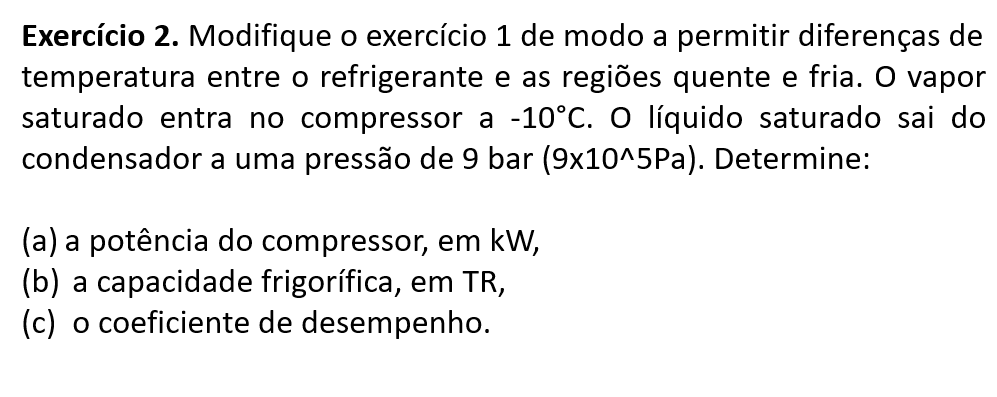

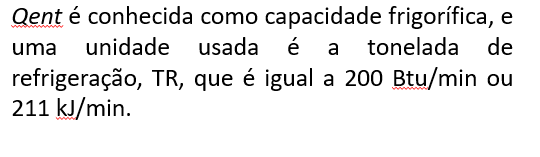

In [ ]:
import sympy as sp 
import numpy as np

#defifnir símbolos
h_1,h_2,h_3,h_4,p_1,p_2,p_3,p_4,T_1,T_2,T_3,T_4,P,C,B = sp.symbols('h_1,h_2,h_3,h_4,p_1,p_2,p_3,p_4,T_1,T_2,T_3,T_4,Potência,Capacidade,beta')

def interpolar(x1,y1,x2,y2,y):
    x_1,y_1,x_2,y_2,x,y_i = sp.symbols('x_1,y_1,x_2,y_2,x,y_i')
    eq_interp = sp.Eq(x,(y_1-y_i)*(x_2-x_1)/(y_1-y_2)+x_1)
    solve_interp = sp.solve(eq_interp.subs({x_1:x1,
                                       y_1:y1,
                                       x_2:x2,
                                       y_2:y2,
                                       y_i:y}))[0]
    return round(solve_interp,4)            

#definir valores para as variáveis

#Estado 1... T= -10
h1 = interpolar(240.15,-12,242.54,-8,-10)   # Kj/kg
s1 = interpolar(0.9267,-12,0.9239,-8,-10)   # Kj/kg.K
#Estado 2... 
s2 = s1
h2 = interpolar(271.25,0.9217,282.34,0.9566,0.9253) # Kj/kg  --> valor tabelado A12 
#estado 3 ... líquido saturado
p3 = 9 
h3 = 99.56 
#estado 4 ... é igual o estado 3 pq a válvula de expansão não muda a entalpia 
h4=h3
#resultado dos estados
estados = [h1,h2,h3,h4]
n=0
print('entalpias:')
for j in estados:
    n += 1
    print(f'h{n} = {j}')

#*********** Letra A ***********
eq_potencia_compressor = sp.Eq(P,abs(h_1-h_2)*0.08)
solve_potencia_compressor = sp.solve(eq_potencia_compressor.subs({h_1:h1,
                                                                  h_2:h2}))[0]
print('\n*********** Letra A ***********')
display(eq_potencia_compressor)
print(f'potencia = {solve_potencia_compressor:.2f} kW')       

#*********** Letra B ***********
eq_capacidade_frigorifica = sp.Eq(C,abs(h_1-h_4)*0.08*60/211) #vai dar em TR
solve_cap_fig = sp.solve(eq_capacidade_frigorifica.subs({h_1:h1,
                                                         h_4:h4
                                                         }))[0]
print('\n*********** Letra B ***********')
display(eq_capacidade_frigorifica)
print(f'Capacidade frigorifica = {solve_cap_fig:.2f} TR')
#*********** Letra C ***********                                             
eq_coef_desemp = sp.Eq(B,abs(h_1-h_4)/abs(h_1-h_2))
solve_coef_desemp = sp.solve(eq_coef_desemp.subs({h_1:h1,
                                                  h_2:h2,
                                                  h_4:h4}))[0]

print('\n*********** Letra C ***********')
display(eq_coef_desemp)
print(f'β = {solve_coef_desemp:.2f}')


entalpias:
h1 = 241.3450
h2 = 272.3940
h3 = 99.56
h4 = 99.56

*********** Letra A ***********


Eq(Potência, 0.08*Abs(h_1 - h_2))

potencia = 2.48 kW

*********** Letra B ***********


Eq(Capacidade, 0.0227488151658768*Abs(h_1 - h_4))

Capacidade frigorifica = 3.23 TR

*********** Letra C ***********


Eq(beta, Abs(h_1 - h_4)/Abs(h_1 - h_2))

β = 4.57


# Exercício 3 Refrigeração

##Função Interpolação

In [13]:
import sympy as sp 

#calculo de interpolação
#usuário chama a função colocando os valores disponíveis para interpolação
def interpolar(yi,x1,y1,x2,y2):
    x_i,y_i,x_1,y_1,x_2,y_2 = sp.symbols('x_i,y_i,x_1,y_1,x_2,y_2')
    eq_interpol = sp.Eq(x_i,(y_1-y_i)*(x_2-x_i)/(y_1-y_2)+x_1)
    interpol = sp.solve(eq_interpol.subs({y_i:yi,
                                        x_1:x1,
                                        y_1:y1,
                                        x_2:x2,
                                        y_2:y2}))[0]
                                        
    display(eq_interpol)
    print(f'interpolação: {interpol:.2f}')



Eq(x_i, x_1 + (x_2 - x_i)*(y_1 - y_i)/(y_1 - y_2))

interpolação: 2.50
